# Manuscript Figures
Author: Sarah Hülsen

This notebook contains code to create all the main figures (not including tables) of the manuscript "Mangroves and their services are at risk from tropical cyclones and sea level rise under climate change".

In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors

In [ ]:
# define data path
data_dir = Path("../../data")
fig_dir = Path("../../figures")

In [ ]:
# define variables for analysis
models = ['miroc6', 'cesm2', 'ecearth6', 'median']
ssps = ['245', '370', '585']
resolution = '0150'

## Figure 1, Panel A
Plot risk index for all SSPs

/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)


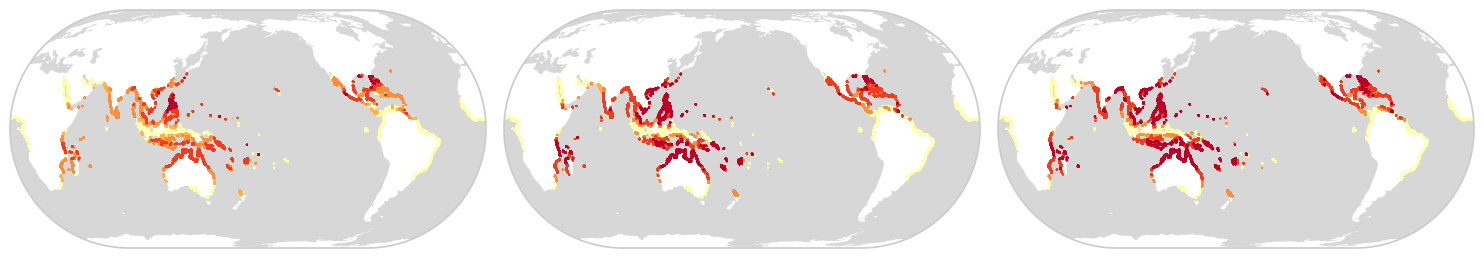

In [ ]:
# central_longitude=180
sns.set(style="whitegrid")

# define colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#ffffb2', '#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'])
label = ('very high','high', 'medium', 'low', 'none')

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 8), subplot_kw={'projection': ccrs.EckertIV(central_longitude=180)})

# Iterate over dataframes and columns to create scatterplots
for i, ssp in enumerate(ssps):
    df = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp{ssp}_2cal_risk.csv'))
    col = 'risk'
    ax = axs[i]
    ax.add_feature(cfeature.OCEAN, facecolor='#D7D7D7')
    extent = ax.get_extent(crs=ccrs.EckertIV(central_longitude=180))
    x1, x2, y1, y2 = extent
    ax.set_ylim([y1, y2])
    
    # Sort points based on the values of the column
    sorted_indices = np.argsort(df[col].values)
    sorted_lon = df['longitude'].values[sorted_indices]
    sorted_lat = df['latitude'].values[sorted_indices]
    sorted_values = df[col].values[sorted_indices]
    
    # Plot sorted points
    scatter = ax.scatter(sorted_lon, sorted_lat, c=sorted_values, cmap=cmap, s=0.25, transform=ccrs.PlateCarree(), zorder=2)

plt.tight_layout()
#plt.savefig(fig_dir.joinpath('risk_map.png'))
plt.show()


## Figure 1, Panel B
Plot change in tropical cyclone frequency (rows: intensity, columns: SSP)

/var/folders/wx/w9st594n22lcgrxddqzwnwd80000gp/T/ipykernel_59473/2323273954.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


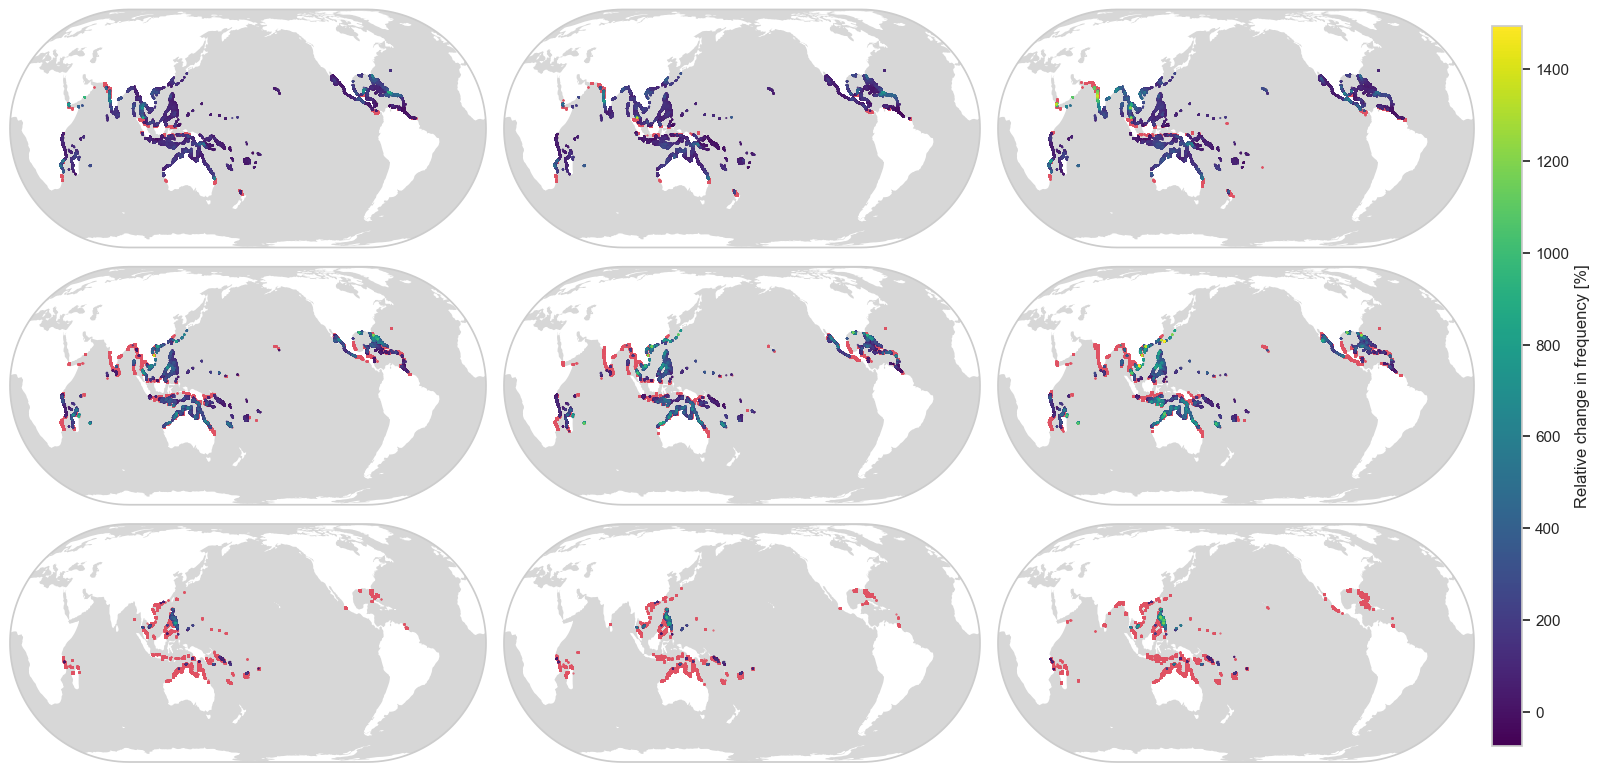

In [ ]:
# central_longitude=180
sns.set(style="whitegrid")

# color scaling per column
df1 = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp245_2cal_changemap_analysed.csv'))
df2 = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp370_2cal_changemap_analysed.csv'))
df3 = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp585_2cal_changemap_analysed.csv'))
dataframes = [df1, df2, df3]
x_dict = {0: '33-49 m/s', 
          1: '50-70 m/s', 
          2: '>70 m/s'}
y_dict = {0: 'SSP245', 
          1: 'SSP370', 
          2: 'SSP585'}

min_list = []
max_list = []
for df in dataframes:
    for col in ['TC1_ratio', 'TC2_ratio', 'TC3_ratio']:
        col_min = df[col].min()
        col_max = df[col].max()
        min_list.append(col_min)
        max_list.append(col_max)
global_min = min(min_list)
global_max = max(max_list)

# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 8), subplot_kw={'projection': ccrs.EckertIV(central_longitude=180)})

# Iterate over dataframes and columns to create scatterplots
for i, df in enumerate(dataframes):
    for j, col in enumerate(['TC1_ratio', 'TC2_ratio', 'TC3_ratio']):
        ax = axs[j, i]
        ax.add_feature(cfeature.OCEAN, facecolor='#D7D7D7')
        extent = ax.get_extent(crs=ccrs.EckertIV(central_longitude=180))
        x1, x2, y1, y2 = extent
        ax.set_ylim([y1, y2])
        
        # Sort points based on the values of the column
        sorted_indices = np.argsort(df[col].values)
        sorted_lon = df['longitude'].values[sorted_indices]
        sorted_lat = df['latitude'].values[sorted_indices]
        sorted_values = df[col].values[sorted_indices]
        
        # Plot sorted points
        scatter = ax.scatter(sorted_lon, sorted_lat, c=sorted_values, cmap='viridis', norm=plt.Normalize(vmin=global_min, vmax=global_max), s=0.25, transform=ccrs.PlateCarree(), zorder=2)

        # Plot newly affected points
        # Filter non-zero values of 'New Affected' column
        non_zero_indices = df[f'TC{j+1}_new_affected'] > 0
        non_zero_lon = df.loc[non_zero_indices, 'longitude']
        non_zero_lat = df.loc[non_zero_indices, 'latitude']
        
        # Plot non-zero points
        scatter2 = ax.scatter(non_zero_lon, non_zero_lat, c='#e05263', s=0.25, transform=ccrs.PlateCarree(), zorder=1)



# Add colorbar
cax = fig.add_axes([1, 0.05, 0.02, 0.9])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=global_min*100, vmax=global_max*100)), cax=cax)
cbar.set_label('Relative change in frequency [%]')

plt.tight_layout()
plt.savefig(fig_dir.joinpath('change_map_ratio_newly_affected.png'))
plt.show()


## Figure 1, Panel C 
Plot regional RSLR for all SSPs

/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)


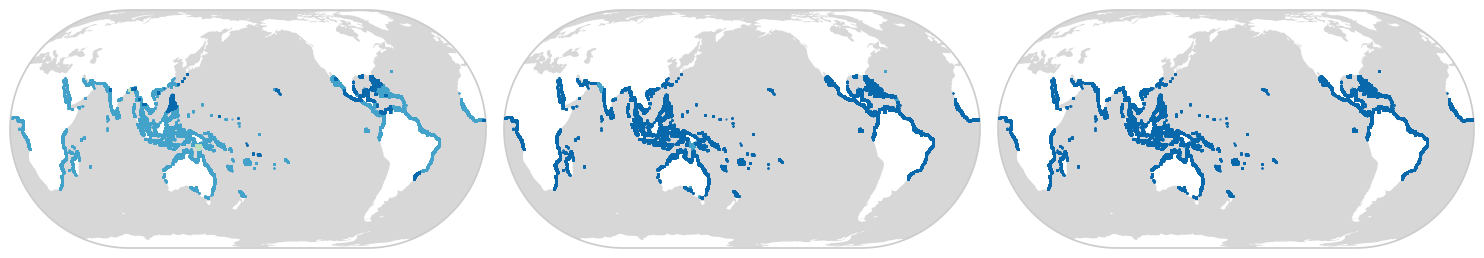

In [ ]:
df = pd.read_csv(data_dir.joinpath('mangroves', 'Bunting_mangroves_2020_global_rslr_all_ssps_2020-2100.csv'))
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 8), subplot_kw={'projection': ccrs.EckertIV(central_longitude=180)})

for i, ssp in enumerate(ssps):
    ax = axs[i]
    ax.add_feature(cfeature.OCEAN, facecolor='#D7D7D7')
    extent = ax.get_extent(crs=ccrs.EckertIV(central_longitude=180))
    x1, x2, y1, y2 = extent
    ax.set_ylim([y1, y2])
    
    # Plot points below 4mm/year
    ind_1 = df[f'RSLR1_ssp{ssp}'] == 1
    lon_1 = df.loc[ind_1, 'longitude']
    lat_1 = df.loc[ind_1, 'latitude']
    scatter1 = ax.scatter(lon_1, lat_1, c='#bae4bc', s=0.25, transform=ccrs.PlateCarree(), zorder=2)
    # Plot points 4-7mm/year
    ind_2 = df[f'RSLR2_ssp{ssp}'] == 1
    lon_2 = df.loc[ind_2, 'longitude']
    lat_2 = df.loc[ind_2, 'latitude']
    scatter2 = ax.scatter(lon_2, lat_2, c='#43a2ca', s=0.25, transform=ccrs.PlateCarree(), zorder=1)
     # Plot points >7mm/year
    ind_2 = df[f'RSLR3_ssp{ssp}'] == 1
    lon_2 = df.loc[ind_2, 'longitude']
    lat_2 = df.loc[ind_2, 'latitude']
    scatter2 = ax.scatter(lon_2, lat_2, c='#0868ac', s=0.25, transform=ccrs.PlateCarree(), zorder=3)


plt.tight_layout()
#plt.savefig(fig_dir.joinpath('rslr_per_ssp_horizontal.png'))
plt.show()

## Figure 2
### Risk map for all hotspot regions and all SSPs

In [ ]:
# define variables for analysis
models = ['miroc6', 'cesm2', 'ecearth6', 'median']
ssps = ['245', '370', '585']
resolution = '0150'
proj_eck4 = '+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'
def_crs = 4326

/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:688: RuntimeWarning: invalid value encountered in covers
  return lib.covers(a, b, **kwargs)
/Users/shuelsen/miniforge3/envs/climada_env/lib/python3.9/site-packages/shapely/predicates.py:730: RuntimeWarning: invalid value encountered in disjoint
  return lib.disjoint(a, b, **kwargs)


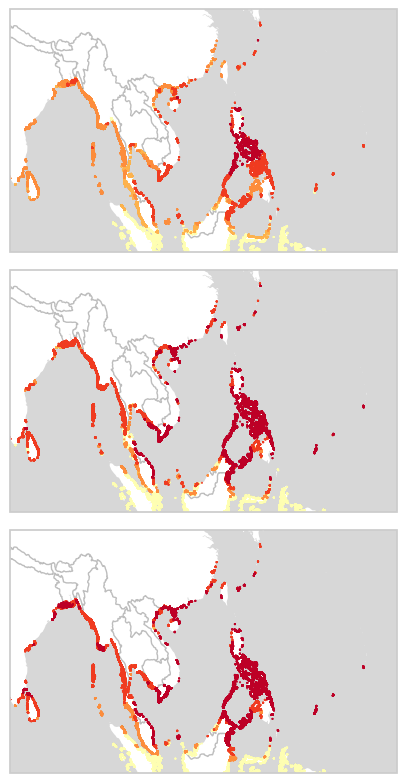

In [ ]:
hotspot = 'SEAS'
lon_min, lat_min, lon_max, lat_max = (80,-1,149.501953,28.071980)
# central_longitude=180
sns.set(style="whitegrid")

# define colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#ffffb2', '#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'])
label = ('very high','high', 'medium', 'low', 'none')

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 8), subplot_kw={'projection': ccrs.EckertIV(), 'extent': [lon_min, lon_max, lat_min, lat_max]})

# Iterate over dataframes and columns to create scatterplots
for i, ssp in enumerate(ssps):
    df = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp{ssp}_2cal_risk.csv'))
    col = 'risk'
    ax = axs[i]
    ax.add_feature(cfeature.OCEAN, facecolor='#D7D7D7')
    ax.add_feature(cfeature.BORDERS, edgecolor='#BDBDBD')

    
    # Sort points based on the values of the column
    sorted_indices = np.argsort(df[col].values)
    sorted_lon = df['longitude'].values[sorted_indices]
    sorted_lat = df['latitude'].values[sorted_indices]
    sorted_values = df[col].values[sorted_indices]
    
    # Plot sorted points
    scatter = ax.scatter(sorted_lon, sorted_lat, c=sorted_values, cmap=cmap, s=0.25, transform=ccrs.PlateCarree(), zorder=2)

plt.tight_layout()
plt.savefig(fig_dir.joinpath(f'risk_map_{hotspot}.png'))
plt.show()

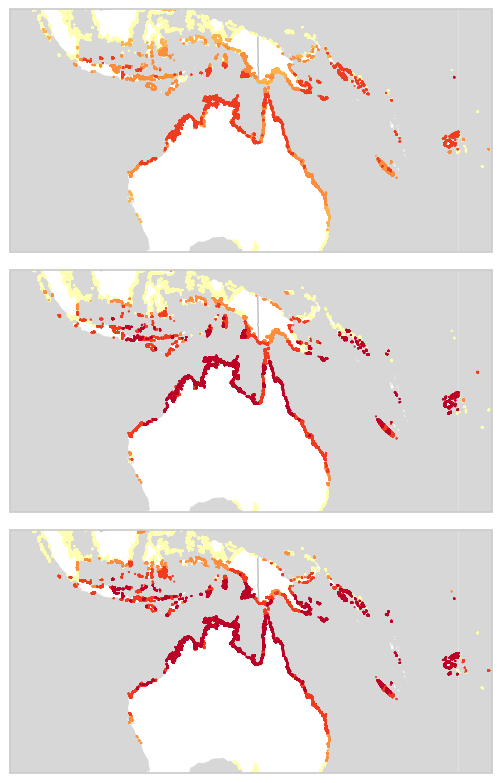

In [ ]:
hotspot = 'SWP'
lon_min, lat_min, lon_max, lat_max = (92.812500,-25,186.503906,1)
# central_longitude=180
sns.set(style="whitegrid")

# define colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#ffffb2', '#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'])
label = ('very high','high', 'medium', 'low', 'none')

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 8), subplot_kw={'projection': ccrs.EckertIV(central_longitude=180), 'extent': [lon_min, lon_max, lat_min, lat_max]})

# Iterate over dataframes and columns to create scatterplots
for i, ssp in enumerate(ssps):
    df = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp{ssp}_2cal_risk.csv'))
    col = 'risk'
    ax = axs[i]
    ax.add_feature(cfeature.OCEAN, facecolor='#D7D7D7')
    ax.add_feature(cfeature.BORDERS, edgecolor='#BDBDBD')

    
    # Sort points based on the values of the column
    sorted_indices = np.argsort(df[col].values)
    sorted_lon = df['longitude'].values[sorted_indices]
    sorted_lat = df['latitude'].values[sorted_indices]
    sorted_values = df[col].values[sorted_indices]
    
    # Plot sorted points
    scatter = ax.scatter(sorted_lon, sorted_lat, c=sorted_values, cmap=cmap, s=0.25, transform=ccrs.PlateCarree(), zorder=2)

plt.tight_layout()
plt.savefig(fig_dir.joinpath(f'risk_map_{hotspot}.png'))
plt.show()

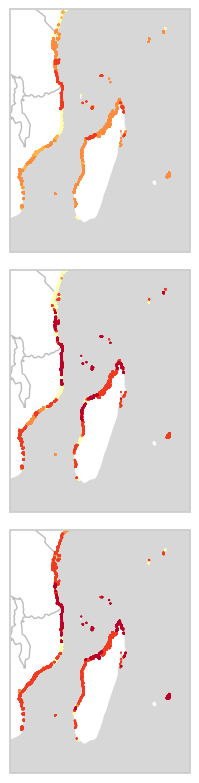

In [ ]:
hotspot = 'SEAF'
lon_min, lat_min, lon_max, lat_max = (34.101563,-28.960089,59.326172,-2.240640)
# central_longitude=180
sns.set(style="whitegrid")

# define colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#ffffb2', '#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'])
label = ('very high','high', 'medium', 'low', 'none')

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 8), subplot_kw={'projection': ccrs.EckertIV(), 'extent': [lon_min, lon_max, lat_min, lat_max]})

# Iterate over dataframes and columns to create scatterplots
for i, ssp in enumerate(ssps):
    df = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp{ssp}_2cal_risk.csv'))
    col = 'risk'
    ax = axs[i]
    ax.add_feature(cfeature.OCEAN, facecolor='#D7D7D7')
    ax.add_feature(cfeature.BORDERS, edgecolor='#BDBDBD')


    
    # Sort points based on the values of the column
    sorted_indices = np.argsort(df[col].values)
    sorted_lon = df['longitude'].values[sorted_indices]
    sorted_lat = df['latitude'].values[sorted_indices]
    sorted_values = df[col].values[sorted_indices]
    
    # Plot sorted points
    scatter = ax.scatter(sorted_lon, sorted_lat, c=sorted_values, cmap=cmap, s=0.25, transform=ccrs.PlateCarree(), zorder=2)

plt.tight_layout()
plt.savefig(fig_dir.joinpath(f'risk_map_{hotspot}.png'))
plt.show()

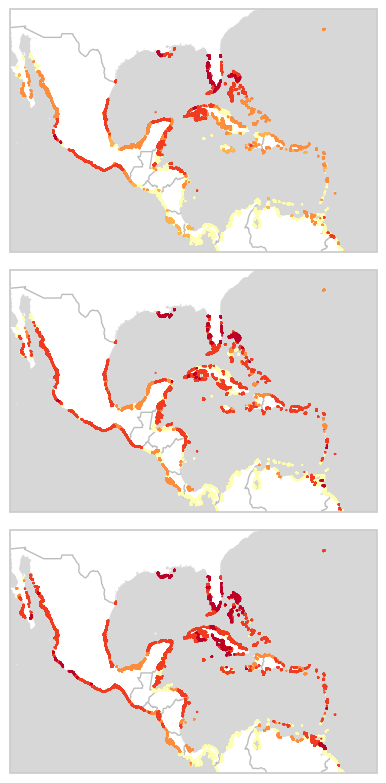

In [ ]:
hotspot = 'CA'
lon_min, lat_min, lon_max, lat_max = (-110,6.5,-55.854492,31.802893)
# central_longitude=180
sns.set(style="whitegrid")

# define colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#ffffb2', '#fed976', '#feb24c', '#fd8d3c', '#f03b20', '#bd0026'])
label = ('very high','high', 'medium', 'low', 'none')

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 8), subplot_kw={'projection': ccrs.EckertIV(), 'extent': [lon_min, lon_max, lat_min, lat_max]})

# Iterate over dataframes and columns to create scatterplots
for i, ssp in enumerate(ssps):
    df = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp{ssp}_2cal_risk.csv'))
    col = 'risk'
    ax = axs[i]
    ax.add_feature(cfeature.OCEAN, facecolor='#D7D7D7')
    ax.add_feature(cfeature.BORDERS, edgecolor='#BDBDBD')

    
    # Sort points based on the values of the column
    sorted_indices = np.argsort(df[col].values)
    sorted_lon = df['longitude'].values[sorted_indices]
    sorted_lat = df['latitude'].values[sorted_indices]
    sorted_values = df[col].values[sorted_indices]
    
    # Plot sorted points
    scatter = ax.scatter(sorted_lon, sorted_lat, c=sorted_values, cmap=cmap, s=0.25, transform=ccrs.PlateCarree(), zorder=2)

plt.tight_layout()
plt.savefig(fig_dir.joinpath(f'risk_map_{hotspot}.png'))
plt.show()

### Plot share of ecosystem services at risk for different regions and SSPs

/var/folders/wx/w9st594n22lcgrxddqzwnwd80000gp/T/ipykernel_48180/184288508.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x)}%' for x in vals])
/var/folders/wx/w9st594n22lcgrxddqzwnwd80000gp/T/ipykernel_48180/184288508.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x)}%' for x in vals])
/var/folders/wx/w9st594n22lcgrxddqzwnwd80000gp/T/ipykernel_48180/184288508.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x)}%' for x in vals])
/var/folders/wx/w9st594n22lcgrxddqzwnwd80000gp/T/ipykernel_48180/184288508.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.se

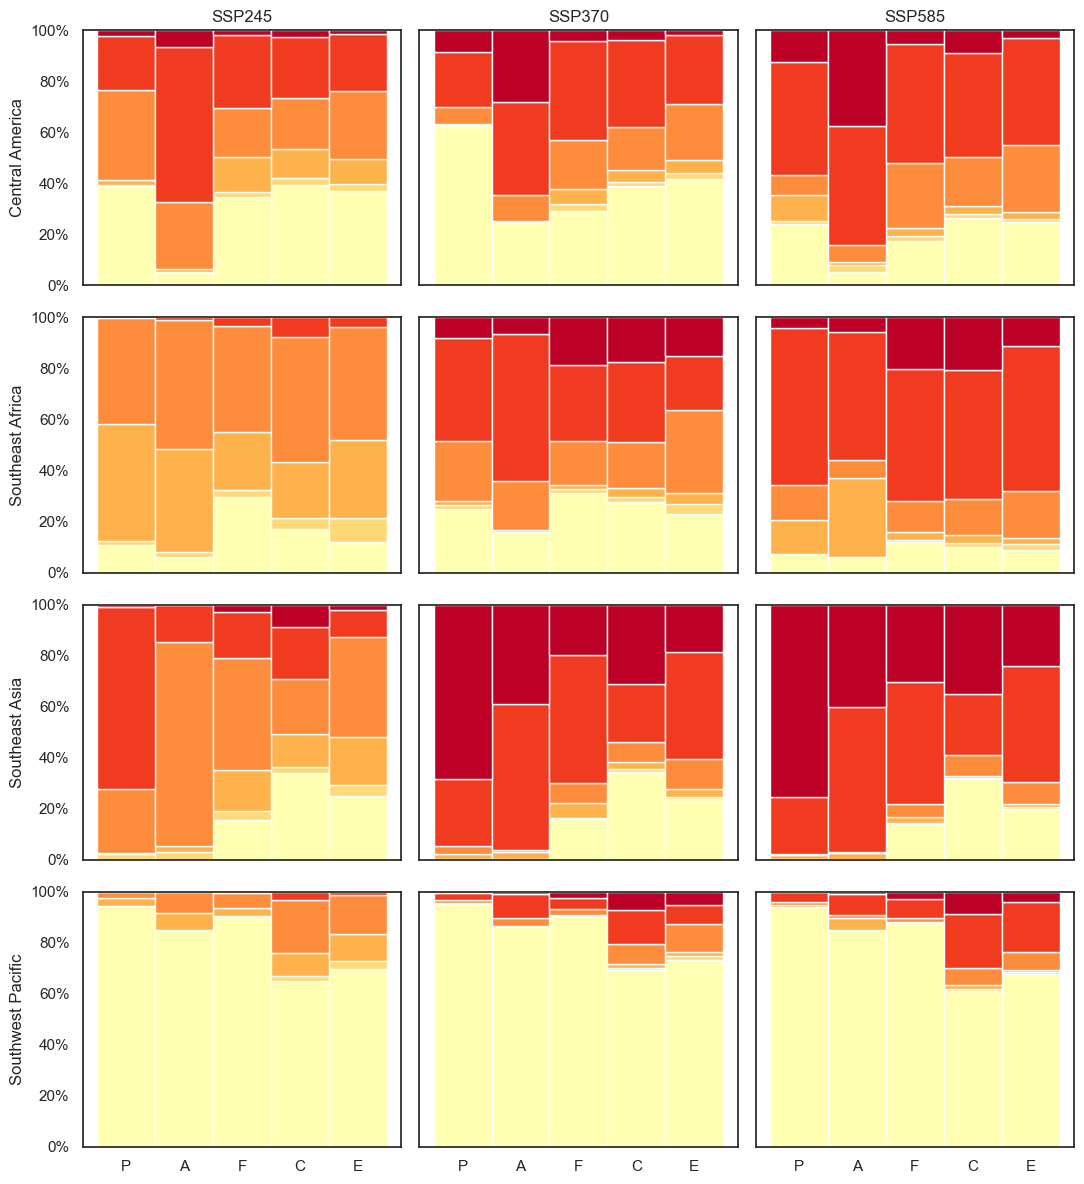

In [ ]:
sns.set(style="white") 
color_mapping = {
    '0': '#ffffb2',
    '1': '#fed976',
    '2': '#feb24c',
    '3': '#fd8d3c',
    '4': '#f03b20',
    '5': '#bd0026'
}

region_dict = {
    'CA': (-110,6.5,-55.854492,31.802893),
    'SEAF': (34.101563,-28.960089,59.326172,-2.240640),
    'SEAS': (80,-1,149.501953,28.071980),
    'SWP': (92.812500,-25,186.503906,1)
}

rows = ['Central America', 'Southeast Africa', 'Southeast Asia', 'Southwest Pacific']
cols = ['SSP245', 'SSP370', 'SSP585']
fig, axs = plt.subplots(4,3, figsize=(11, 12), sharey='row', sharex='col')

for i, ssp in enumerate(ssps):
    for j, key in enumerate(region_dict.keys()):
        ax = axs[j, i]
        df = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_0150as_MIT_median_ssp{ssp}_2cal_ES_area_risk_proportions_{key}_PAs.csv'), index_col='Unnamed: 0')
        # Ensure the dataframe has all columns, even if they are missing in the data
        for col in color_mapping.keys():
            if col not in df.columns:
                df[col] = 0
        
        # Sort the dataframe columns to ensure consistent order
        df = df[sorted(df.columns, key=lambda x: int(x))]
        
        # Plot the stacked bar chart with consistent colors
        df.plot(ax=ax, kind='bar', width=1, stacked=True, color=[color_mapping[col] for col in df.columns], legend=False)
        
        ax.set_xticklabels(['P', 'A', 'F', 'C', 'E'], rotation=0)
        ax.set_ylim([0, 100])
        vals = ax.get_yticks()
        ax.set_yticklabels([f'{int(x)}%' for x in vals])

for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation='vertical')
plt.tight_layout()
fig.savefig(fig_dir.joinpath(f'ES_area_stacked_bar_all.svg'), bbox_inches='tight')

## Figure 3
### Non-analog TC disturbance

/var/folders/wx/w9st594n22lcgrxddqzwnwd80000gp/T/ipykernel_59473/2230413900.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


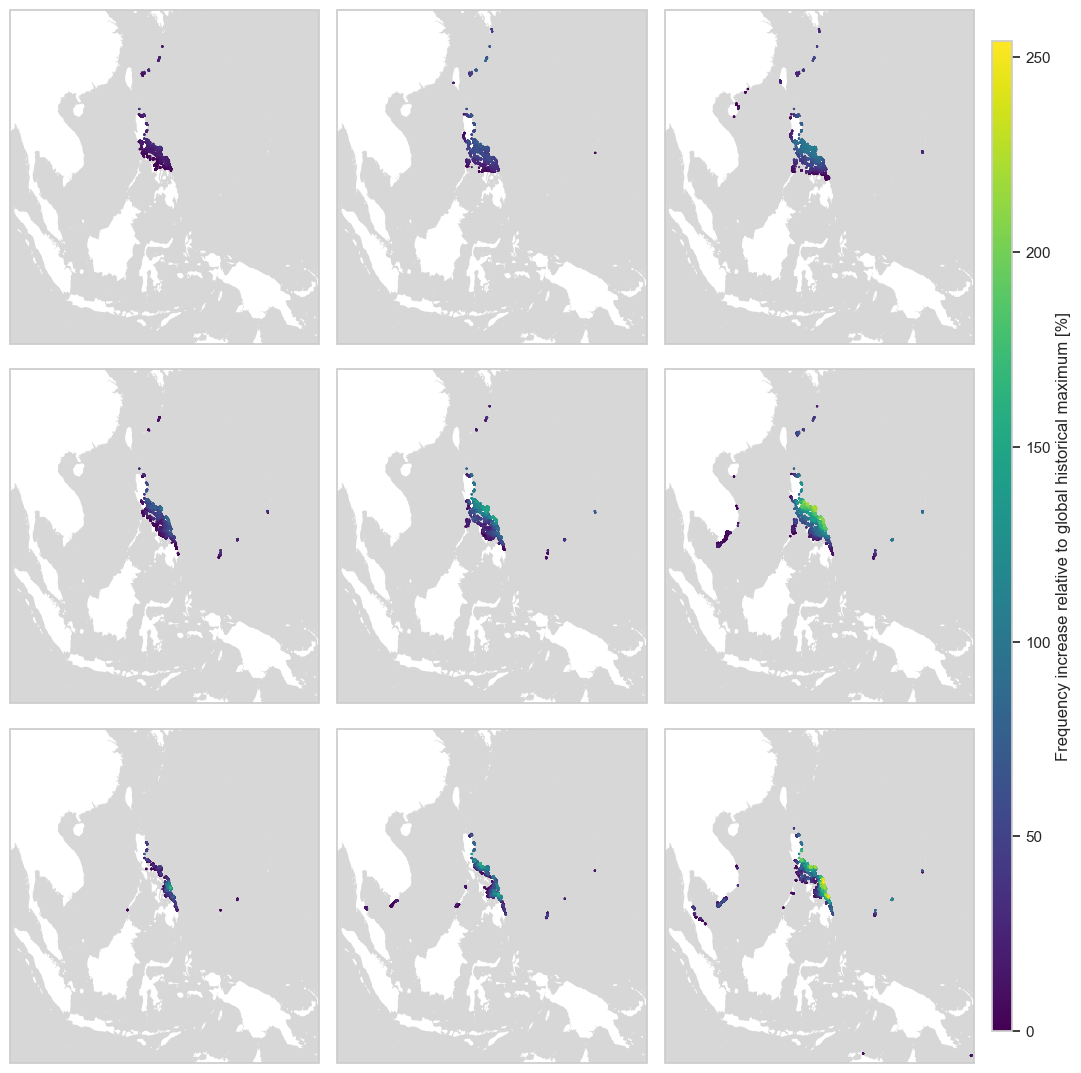

In [ ]:
df245 = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp245_2cal_non_analogs.csv'))
df370 = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp370_2cal_non_analogs.csv'))
df585 = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp585_2cal_non_analogs.csv'))
dataframes = [df245, df370, df585]

# get extents
lon_list = []
lat_list = []
for df in dataframes:
    for cat in range(1, 4):
        non_zero_pts = df[df[f'TC{cat}_non_analog_ratio'] > 0]
        lon_list.extend(non_zero_pts['longitude'].values.flatten())
        lat_list.extend(non_zero_pts['latitude'].values.flatten())
lon_min = min(lon_list)
lon_max = max(lon_list)
lat_min = min(lat_list)
lat_max = max(lat_list)

# get min, max values per column
min_list = []
max_list = []
for df in dataframes:
    for col in ['TC1_non_analog_ratio', 'TC2_non_analog_ratio', 'TC3_non_analog_ratio']:
        col_min = df[col].min()
        col_max = df[col].max()
        min_list.append(col_min)
        max_list.append(col_max)
global_min = min(min_list)
global_max = max(max_list)

norm= plt.Normalize(vmin=global_min*100, vmax=global_max*100)

# Create subplots
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 3, figsize=(10,11), subplot_kw={'projection': ccrs.EckertIV(), 'extent': [lon_min, lon_max, lat_min, lat_max]})
cols = ['33-49 m/s', '50-70 m/s', '>70 m/s']
rows = ['SSP245', 'SSP370', 'SSP585']

for i, ssp in enumerate(ssps):
    
    df = pd.read_csv(data_dir.joinpath(f'Bunting_mangroves_TC_global_{resolution}as_MIT_median_ssp{ssp}_2cal_non_analogs.csv'))

    for cat in range(1, 4):
        ax = axs[cat-1, i]
        ax.add_feature(cfeature.OCEAN, facecolor='#D7D7D7')
        extent = ax.get_extent(crs=ccrs.EckertIV())
        x1, x2, y1, y2 = extent
        ax.set_ylim([y1, y2])

        # Extract non-zero values and corresponding coordinates
        non_zero_indices = df[f'TC{cat}_non_analog_ratio'] > 0
        non_zero_lon = df.loc[non_zero_indices, 'longitude']
        non_zero_lat = df.loc[non_zero_indices, 'latitude']
        non_zero_values = df.loc[non_zero_indices, f'TC{cat}_non_analog_ratio'] * 100
        
        # Sort by values (ascending order so highest values are plotted last)
        sorted_indices = non_zero_values.argsort()
        non_zero_lon = non_zero_lon.iloc[sorted_indices]
        non_zero_lat = non_zero_lat.iloc[sorted_indices]
        non_zero_values = non_zero_values.iloc[sorted_indices]
        
        # Apply the normalization to the scatter plot
        scatter = ax.scatter(non_zero_lon, non_zero_lat, c=non_zero_values, cmap='viridis', s=0.3, 
                             norm=norm, transform=ccrs.PlateCarree())

# Add colorbar with the same normalization
cax = fig.add_axes([1, 0.05, 0.02, 0.9])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=norm), cax=cax)
cbar.set_label('Frequency increase relative to global historical maximum [%]')

plt.tight_layout()
plt.savefig(fig_dir.joinpath('change_map_ratio_non_analog.png'))
plt.show()